## Plot Accuracy (Our vs Bui et al.)

This notebook is used to create the Figure 6 of the paper.

In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt

## Data


In [2]:
main_online_dir = r"../split_mnist_runs/online_memory/"
main_streaming_dir = r"../split_mnist_runs/streaming/"

In [3]:
# Storing online_gp values
online_gp_values = []
for file in os.listdir(main_online_dir):
    exp_dir = os.path.join(main_online_dir, file)
    
    if not os.path.isdir(exp_dir):
        continue
    
    online_statistics_path = os.path.join(exp_dir, "training_statistics.npz")
    online_statistics = np.load(online_statistics_path)
    online_acc = online_statistics["acc"]
    break_points = online_statistics["task_break_pnts"]
    
    for i in range(len(break_points)):
        if i==0:
            y = online_acc[:break_points[i]]
            x = np.linspace(0, break_points[i], y.shape[0])
        else:
            y = online_acc[break_points[i-1]:break_points[i]]
            x = np.linspace(break_points[i-1], break_points[i], y.shape[0])
            
        online_gp_values.append((x, y))

In [4]:
# Storing streaming_gp values
streaming_gp_values = []
for file in os.listdir(main_streaming_dir):
    exp_dir = os.path.join(main_streaming_dir, file)
    
    if not os.path.isdir(exp_dir):
        continue
    
    statistics_path = os.path.join(exp_dir, "training_statistics.npz")
    statistics = np.load(statistics_path)
    acc = statistics["acc"]
    
    for i in range(len(break_points)):
        if i==0:
            y = acc[:break_points[i]]
            x = np.linspace(0, break_points[i], y.shape[0])
        else:
            y = acc[break_points[i-1]:break_points[i]]
            x = np.linspace(break_points[i-1], break_points[i], y.shape[0])
            
        streaming_gp_values.append((x, y))

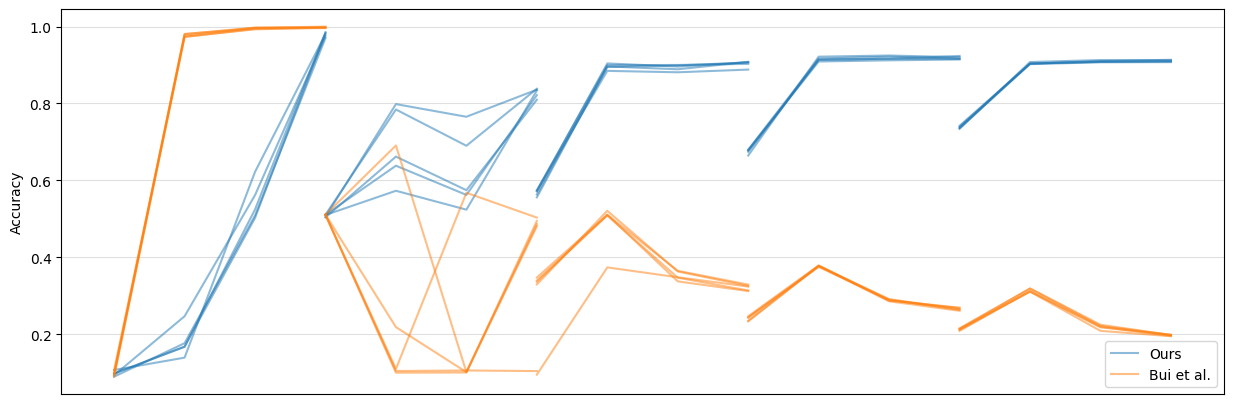

In [11]:
fig, axs = plt.subplots(1, 1, figsize=(15, 5))

for i, online_val in enumerate(online_gp_values):
    label = "Ours" if i==0 else None
    plt.plot(online_val[0], online_val[1], alpha=0.5, color="tab:blue", label=label)
    
for i, streaming_val in enumerate(streaming_gp_values):
    label = "Bui et al." if i==0 else None
    plt.plot(streaming_val[0], streaming_val[1], alpha=0.5, color="tab:orange", label=label)

plt.ylabel("Accuracy")
plt.xticks([], [])

plt.grid(True, alpha=0.4)
plt.legend()
plt.show()
